# Bike Sharing Demand
### EDA

The data was obtained from [kaggle](https://www.kaggle.com/c/bike-sharing-demand/data?select=train.csv).

In this study, Explatory Data Analysis (EDA) will be performed to see which features affect the bike rental.

Here is context from the author:
#### Context
You are provided hourly rental data spanning two years.   
The training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month.   

#### Data Fields
| Varaible | Definition|
| --- | --- |
| datetime | hourly date + timestamp |
| season | 1 = spring, 2 = summer, 3 = fall, 4 = winter |
| holiday | whether the day is considered a holiday |
| workingday | whether the day is neither a weekend nor holiday |
| weather | 1: Clear, Few clouds, Partly cloudy, Partly cloudy |
| | 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist |
| | 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds |
| | 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| temp | temperature in Celsius |
| atemp | "feels like" temperature in Celsius |
| humidity | relative humidity |
| windspeed | wind speed |
| casual | number of non-registered user rentals initiated |
| registered | number of registered user rentals initiated |
| count | number of total rentals |

In [1]:
# Call in packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Get only train data as train data has the count variable

df = pd.read_csv("train.csv")

In [3]:
# Look at the data
display(df.shape)
display(df.head())
display(df.isnull().sum())

(10886, 12)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are total of 14 columns and 10886 rows. No data is missing.

In [4]:
# Convert the datetime column to datetime data type
df.datetime = pd.to_datetime(df.datetime)

# Extract hours of time only
df["hours"] = df["datetime"].dt.hour

# Extract days of week. 0 = Monday, 1 = Tuesday, ... , 6 = Sunday
df["dayOfWeek"] = df["datetime"].dt.weekday

In [5]:
# Create correlation matrix. Drop datetime column
df_noDatetime = df.drop("datetime",axis=1).copy()
df_corr1 = df_noDatetime.corr()
df_corr1

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hours,dayOfWeek
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.006546,-0.010553
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.000354,-0.191832
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,0.002780,-0.704267
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.022740,-0.047692
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.145430,-0.038466
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.140343,-0.040235
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.278011,-0.026507
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.146631,-0.024804
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.302045,0.246959
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.380540,-0.084427


By looking at the numbers, it does not stand out visually which features have correlations. Let's display this numbers as heat map.

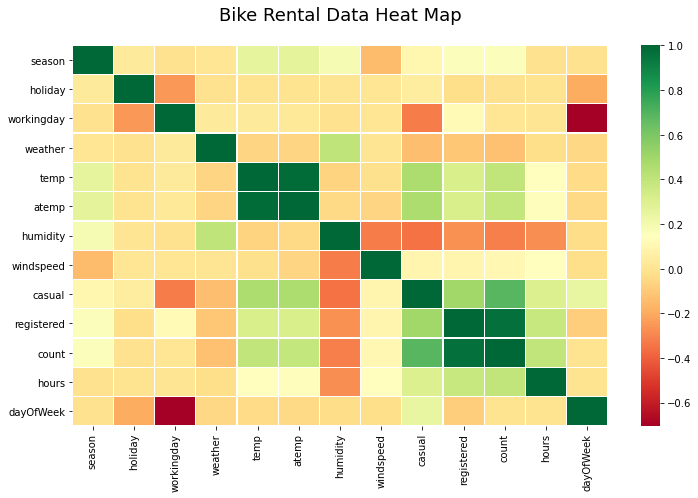

In [6]:
# Define the plot
fig, ax = plt.subplots(figsize=(12,7))

# Add title to the Heat map
title = "Bike Rental Data Heat Map"

# Set the font size and the distance of the title from the plot
plt.title(title, fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])

# Remove the axes
ax.axis()

# Use the heatmap function from the seaborn library
sns.heatmap(df_corr1, cmap="RdYlGn",fmt='',linewidths = 0.30, ax=ax)

# Display the Heatmap
plt.show()

This visualisation approach is much effective explaining the correlations between data.  
We see that "count" feature is depended on hours, atemp, and temp features.

In [7]:
# Group by day of the week
df_dow = df.groupby("dayOfWeek").mean().reset_index()
df_dow = df_dow[["dayOfWeek","casual","registered","count"]]

([<matplotlib.axis.XTick at 0x23d720deb50>,
 [Text(0, 0, 'Monday'),
  Text(0, 0, 'Tuesday'),
  Text(0, 0, 'Wednesday'),
  Text(0, 0, 'Thursday'),
  Text(0, 0, 'Friday'),
  Text(0, 0, 'Saturday'),
  Text(0, 0, 'Sunday')])

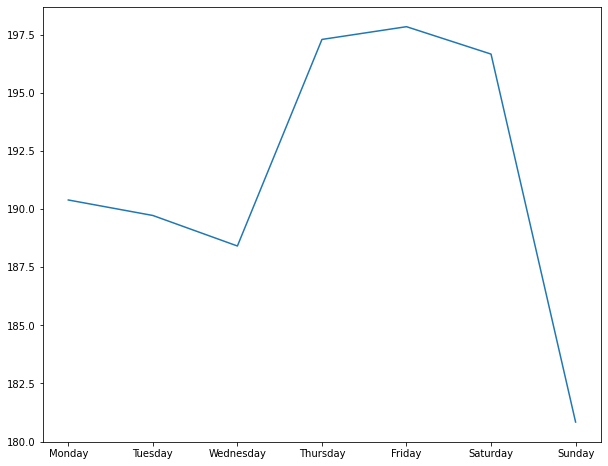

In [8]:
# plot the line graph for day of week 
# select the size of the plot
plt.figure(figsize=(10,8))

# plot day of week vs average count
dow = plt.plot(df_dow["dayOfWeek"], df_dow["count"])
plt.xticks(np.arange(7), ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',"Saturday", "Sunday"))

In the line plot, we see that Friday is the highest bike rental day.The bike rental number starts to increase from Wednesday until Friday. It continues its high rental number until Saturday (N: ~198) and we have a drop on Sunday day (N: ~180). The number comes back on Monday (N: ~190) and recovers the bike rental from Wednesday.

In [9]:
# Group by Hours
df_hours = df.groupby("hours").mean().reset_index()

# Make a table with four columns onllly
df_hours = df_hours[["hours","casual","registered","count"]]
df_hours

,hours,casual,registered,count
0,0,10.312088,44.826374,55.138462
1,1,6.513216,27.345815,33.859031
2,2,4.819196,18.080357,22.899554
3,3,2.681293,9.076212,11.757506
4,4,1.262443,5.144796,6.407240
5,5,1.455752,18.311947,19.767699
6,6,4.149451,72.109890,76.259341
7,7,10.914286,202.202198,213.116484
8,8,21.542857,341.226374,362.769231
9,9,30.956044,190.824176,221.780220


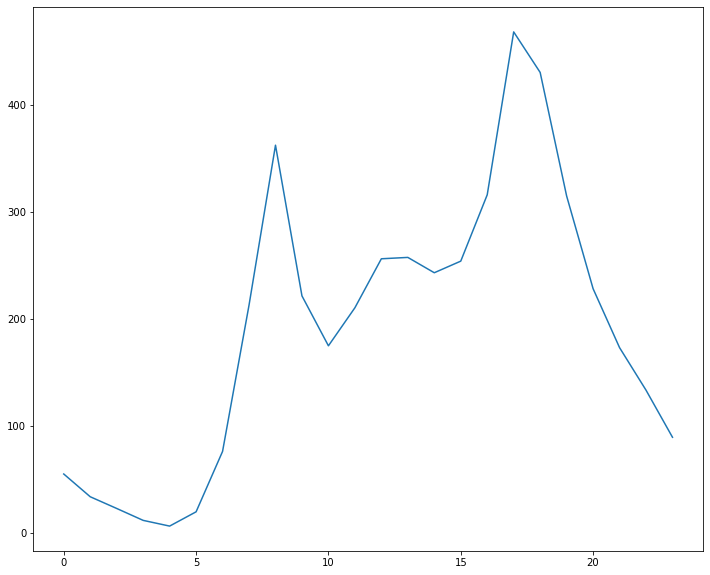

In [10]:
# plot the line graph with 24 hours vs average count
# plot the sie of each drivers.
plt.figure(figsize=(12,10))
dow = plt.plot(df_hours["hours"], df_hours["count"])

In [22]:
# Group by season, hours and ay of week resptively.
df_season_hours_dow = df.groupby(["season","hours", "dayOfWeek"]).mean().reset_index()
df_season_hours_dow

,season,hours,dayOfWeek,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,0.2000,0.8000,1.200000,10.605333,13.030333,56.333333,14.866853,2.733333,13.333333,16.066667
1,1,0,1,0.0000,1.0000,1.400000,10.769333,13.434333,60.800000,11.867040,1.933333,11.066667,13.000000
2,1,0,2,0.0000,1.0000,1.411765,11.045882,14.037941,65.647059,10.648271,1.058824,14.176471,15.235294
3,1,0,3,0.0000,1.0000,1.588235,12.203529,14.661176,58.823529,14.058176,3.000000,16.529412,19.529412
4,1,0,4,0.0000,1.0000,1.500000,12.556250,15.767500,63.875000,12.875725,3.125000,26.625000,29.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,4,23,2,0.0000,1.0000,1.562500,16.195000,19.222812,75.562500,11.938144,7.937500,69.562500,77.500000
668,4,23,3,0.0000,1.0000,1.250000,15.631250,19.034062,66.000000,9.689037,7.437500,94.562500,102.000000
669,4,23,4,0.0625,0.9375,1.125000,14.760000,17.849375,64.812500,10.251000,12.437500,99.000000,111.437500
670,4,23,5,0.0000,0.0000,1.352941,14.470588,18.047941,68.176471,7.706182,19.176471,97.235294,116.411765


In [12]:
# Groupby Spring season, hours, dow
df_season_hours_dow[df_season_hours_dow.season == 1]

,season,hours,dayOfWeek,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,0.2,0.8,1.200000,10.605333,13.030333,56.333333,14.866853,2.733333,13.333333,16.066667
1,1,0,1,0.0,1.0,1.400000,10.769333,13.434333,60.800000,11.867040,1.933333,11.066667,13.000000
2,1,0,2,0.0,1.0,1.411765,11.045882,14.037941,65.647059,10.648271,1.058824,14.176471,15.235294
3,1,0,3,0.0,1.0,1.588235,12.203529,14.661176,58.823529,14.058176,3.000000,16.529412,19.529412
4,1,0,4,0.0,1.0,1.500000,12.556250,15.767500,63.875000,12.875725,3.125000,26.625000,29.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1,23,2,0.0,1.0,1.470588,12.348235,14.705882,58.588235,16.236071,4.235294,35.941176,40.176471
164,1,23,3,0.0,1.0,1.352941,12.734118,15.775294,53.941176,13.118600,4.294118,50.470588,54.764706
165,1,23,4,0.0,1.0,1.500000,13.017500,16.429688,57.750000,8.812594,7.875000,54.437500,62.312500
166,1,23,5,0.0,0.0,1.352941,12.782353,15.150882,55.058824,17.118106,9.117647,55.647059,64.764706


([<matplotlib.axis.YTick at 0x23d72691550>,
 <a list of 3 Text major ticklabel objects>)

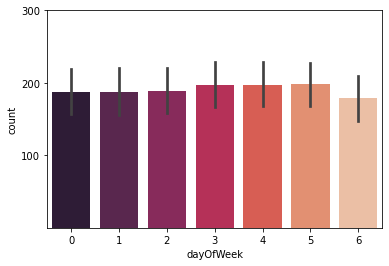

In [13]:
# Plot the average number of bike rentals in all season
sns.barplot(x=df_season_hours_dow["dayOfWeek"], y=df_season_hours_dow["count"], palette="rocket")
plt.yticks(np.arange(100,301, step=100))

We can observe that starting from Thursday to Saturday, the number is jumping up.

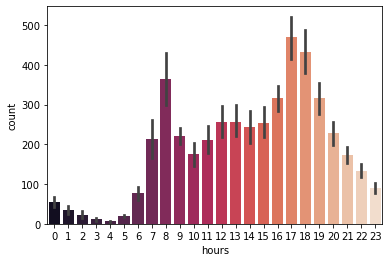

In [26]:
# plot x axis: 24 hours and yaxis: bike rental
sns.barplot(x=df_season_hours_dow["hours"], y=df_season_hours_dow["count"], palette="rocket")

We have two bike rental spikes in the plot: 8 am and 17 pm. This is the time when most employee commute to the work. 

In [15]:
# Create each dataframe for each season
df_spring = df_season_hours_dow[df_season_hours_dow.season == 1]
df_summer = df_season_hours_dow[df_season_hours_dow.season == 2]
df_fall = df_season_hours_dow[df_season_hours_dow.season == 3]
df_winter= df_season_hours_dow[df_season_hours_dow.season == 4]

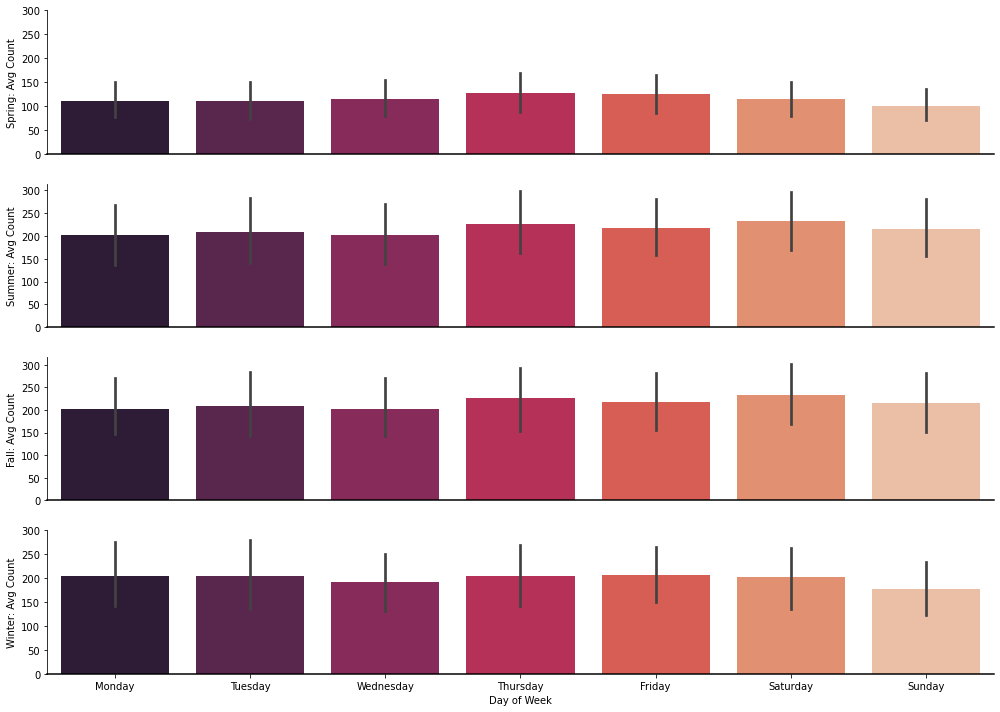

In [16]:
# Set up the matplotlib figure
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

sns.barplot(x=df_spring["dayOfWeek"], y=df_spring["count"], palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Spring: Avg Count")
ax1.xaxis.set_visible(False)
ax1.set_yticks(np.arange(0,301, step=50))

sns.barplot(x=df_summer["dayOfWeek"], y=df_summer["count"], palette="rocket", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Summer: Avg Count")
ax2.xaxis.set_visible(False)
ax2.set_yticks(np.arange(0,301, step=50))

sns.barplot(x=df_summer["dayOfWeek"], y=df_summer["count"], palette="rocket", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Fall: Avg Count")
ax3.xaxis.set_visible(False)
ax3.set_yticks(np.arange(0,301, step=50))

sns.barplot(x=df_winter["dayOfWeek"], y=df_winter["count"], palette="rocket", ax=ax4)
ax4.axhline(0, color="k", clip_on=False)
ax4.set_ylabel("Winter: Avg Count")
ax4.xaxis.set_visible(True)
ax4.set_yticks(np.arange(0,301, step=50))
ax4.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
ax4.set_xlabel("Day of Week")

sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# one liner to remove *all axes in all subplots*
# plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

In spring season, bike rental business is renting a bit above half bike rentals compared to other seasons.

In [17]:
for i in range(1,len(df.season.unique())+1):
    df_spring_ori = df[df.season == i]
    df_spring_ori_gb = df_spring_ori.groupby(['season', 'dayOfWeek']).agg({'casual':'sum','registered':'sum','count':'sum'}).reset_index()
    display(df_spring_ori_gb)

,season,dayOfWeek,casual,registered,count
0,1,0,4099,35729,39828
1,1,1,2859,38263,41122
2,1,2,3550,43024,46574
3,1,3,3868,47580,51448
4,1,4,4971,43090,48061
5,1,5,12822,34161,46983
6,1,6,9436,29046,38482


,season,dayOfWeek,casual,registered,count
0,2,0,13480,64469,77949
1,2,1,11883,73013,84896
2,2,2,10286,67360,77646
3,2,3,12939,73656,86595
4,2,4,15835,67795,83630
5,2,5,32858,56437,89295
6,2,6,32391,55880,88271


,season,dayOfWeek,casual,registered,count
0,3,0,19131,74939,94070
1,3,1,13420,74186,87606
2,3,2,14857,79357,94214
3,3,3,13763,76139,89902
4,3,4,17338,73885,91223
5,3,5,33045,59744,92789
6,3,6,31164,59694,90858


,season,dayOfWeek,casual,registered,count
0,4,0,9578,73871,83449
1,4,1,7203,71158,78361
2,4,2,6238,67554,73792
3,4,3,6713,71743,78456
4,4,4,9258,70332,79590
5,4,5,22057,60394,82451
6,4,6,17093,50842,67935


There are four tables above; spring, summer, fail and winter season.

In [18]:
df_spring_ori = df[df.season == 1]
df_summer_ori = df[df.season == 2]
df_fall_ori = df[df.season == 3]
df_winter_ori = df[df.season == 4]

df_spring_ori_gb = df_spring_ori.groupby(['season', 'dayOfWeek']).agg({'casual':'sum','registered':'sum','count':'sum'}).reset_index()
df_summer_ori_gb = df_summer_ori.groupby(['season', 'dayOfWeek']).agg({'casual':'sum','registered':'sum','count':'sum'}).reset_index()
df_fall_ori_gb = df_fall_ori.groupby(['season', 'dayOfWeek']).agg({'casual':'sum','registered':'sum','count':'sum'}).reset_index()
df_winter_ori_gb = df_winter_ori.groupby(['season', 'dayOfWeek']).agg({'casual':'sum','registered':'sum','count':'sum'}).reset_index()

In [24]:
df_season = df.groupby(['season', 'dayOfWeek']).agg({'temp':"mean",'casual':'sum','registered':'sum','count':'sum'}).reset_index()

([<matplotlib.axis.YTick at 0x23d72a8a130>,
 <a list of 7 Text major ticklabel objects>)

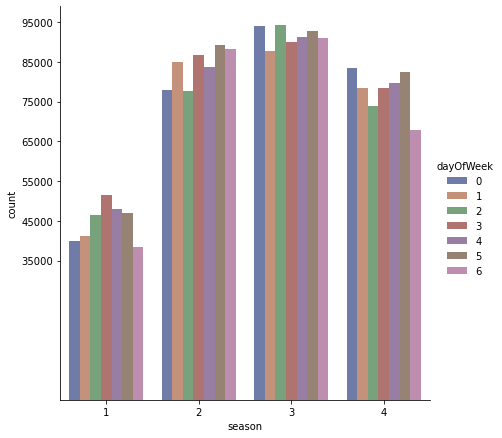

In [20]:
sns.catplot(
    data=df_season, kind="bar",
    x="season", y="count", hue="dayOfWeek",
    ci="sd", palette="dark", alpha=.6, height=6
)
plt.yticks(np.arange(35000,100000, step=10000))

Each season has a different preference days when renting bikes.  
In spring, Wednesday solely stands out for bike rentals.  
In summer, Monday and Wednesday are lowest out of other days of week.  
In fall, Monday and Wednesday stand out for high number of bike rental compared with other days.  
In winter, Monday and Saturday stand ouf for high number of bike rental compared with other days.

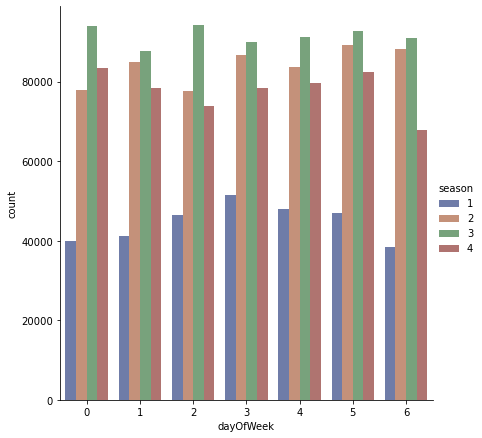

In [21]:
sns.catplot(
    data=df_season, kind="bar",
    x="dayOfWeek", y="count", hue="season",
    ci="sd", palette="dark", alpha=.6, height=6
)
# plt.yticks(np.arange(35000,100000, step=10000))

Season 3 (Fall) is the most popular season out of four. For every day of week, season 3 has the highest sum of bike rentals.  
Next is the summer season, following winder and spring.  
In spring, the bike rental is almost half of the fall winter.  

As we have data for temperature, we can find the average temperatures for all the seasons.

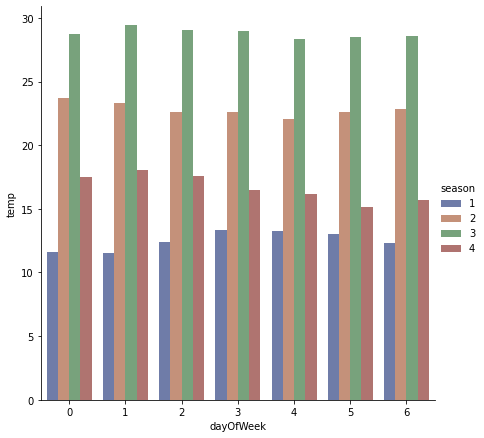

In [25]:
sns.catplot(
    data=df_season, kind="bar",
    x="dayOfWeek", y="temp", hue="season",
    ci="sd", palette="dark", alpha=.6, height=6
)

Looking at the above plots, people rented bikes on hottest temperatures (28 - 30 Celsius). Surprisingly, this town's fall temperature his higher than its summer temperature.   


<Figure size 1152x432 with 0 Axes>

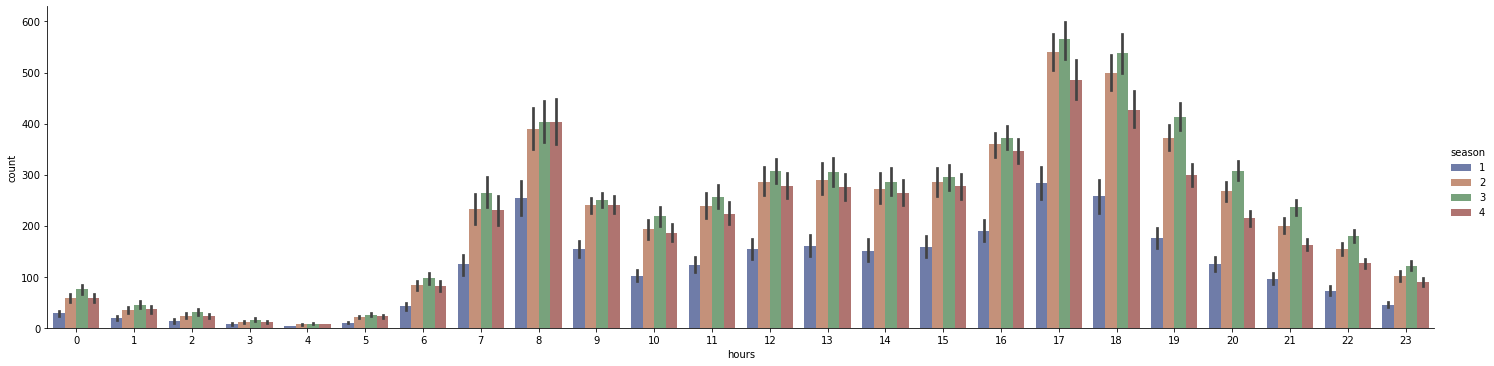

In [48]:
plt.figure(figsize=(16, 6))
sns.catplot(
    data=df, kind="bar",
    x="hours", y="count", hue="season", palette="dark", alpha=.6, aspect=4
)
plt.show()

In summary, after EDA, it was observed that the fall is the most popular season for bike rental. In every season, there are loyal customers who use the bike rental service for commuting. Other than two spikes at 8am and 5pm, bike rental is steady from 7am to 8pm. There is a trend after 5pm that the rented bike number decreases overtime. In order to keep the rented bike unit higher, I would suggest purchasing LED light for the wheels and promote online via instagram, facebook, influencers, and etc to bring more customers to the business. See image for below.



![](download.jpg)